# Challenge - 01: (Document 1)


## Study and document the evolution of ANN from Perceptron with derivation.


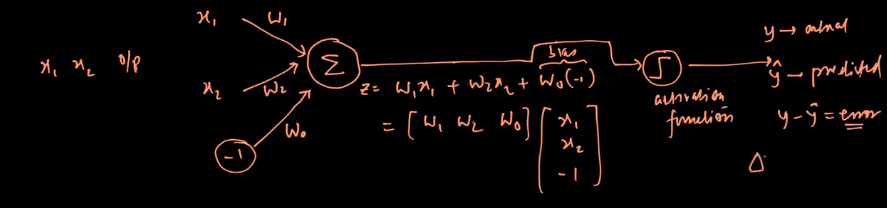


# What is Perceptron ? 

1. The perceptron is one of the earliest neural networks. 
2. The Perceptron was invented at the Cornell Aeronautical Laboratory in 1957 by Frank Rosenblatt 
3. The Perceptron was an attempt to understand human memory & its learning process 
4. Perceptron includes 4 different parameters : <br>
     a. Input <br>
     b. Weights<br>
     c. Biase<br>
     d. Activation Function <br> 
5. Mathematically expressed as <br>

      <b> sigma(z) = Activation_Function(w0xo0 + w1x1 + w2x2 + ...) </b> <br>


6. Where x0,x1,x2 are input features and w0,w1,w2 are weights where w0 is a biase weights 
7. It has multiple inputs with its corresponding weights which is finally added and apply activation function 
6. Perceptron uses <b> step function </b> as a Activation function 



# Mathematical Intuitions of Perceptron 

Let us understand the mathematical Intuitions of Neural Network with the help of image mention below:
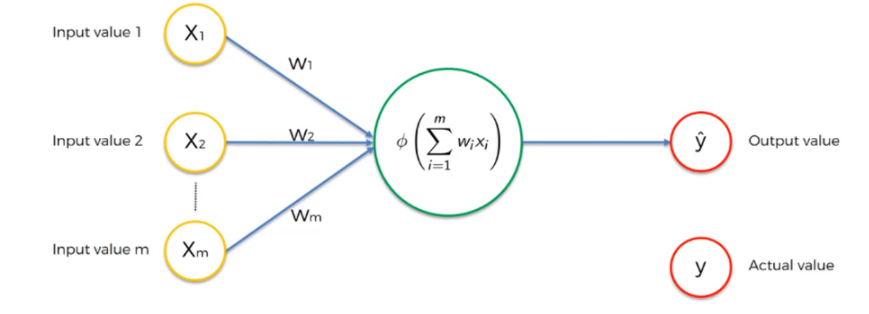

Each Neurons in the left indicates an independent input features, which are multiplied with their weights and finally summed up to make a probability of predicted output which is mathematically expressed as mentioned below: 

                                 z = f(x) = x1*w1 + x2*w2 + x3*w3 + ..  + xm*wm + biases 

$$ z = \sum_{i = 1}^{m} x_{i}*w_{i} $$

finally biases are added on the last. Bias is just like an intercept added in a linear equation. It is an additional parameter in the Neural Network which is used to adjust the output along with the weighted sum of the inputs to the neuron. Here Weights plays a very important role , as weights are adjusted accordingly in order to activate the following inputs . 

$$\sigma \left ( z \right ) = -> Activation Function (Step Function )$$

Activation functions is a function which helps in adjusting the weights of a neurons based on the biased coditions in order to predict the correct output. These type of functions are attached to each neuron in the network, and determines whether it should be activated or not, based on whether each neuron’s input is relevant for the model’s prediction. 

### Step Function

It is a function which brings out the output values within the range (0 ,1), such that 
$$ \sigma \left ( z \right ) = \left\{\begin{matrix}
1 & if y >0 \\ 
0 & if y <=0
\end{matrix}\right. $$

### Perceptron Weight Rule 

Perceptron adjust its weight based on the mathematical formula mention below : 
$$ w_{new} = w_{old} + \Delta w $$
 
where $$ \Delta w = \gamma*(actual output - predicted output)*x_{i} $$

where gamma is a learning rate which is a constant varaible lies in the range (0,1) 

# Implementation of Perceptron in Python 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import joblib 
import pandas as pd 

plt.style.use("fivethirtyeight")

In [2]:
activationFunction = lambda inputs, weights: np.where(np.dot(inputs, weights) > 0 , 1,0)

In [3]:
# We can either create function in one line using lambda function or using long as shown below.
def activationFunction(inputs, weights):
    z = np.dot(inputs, weights)
    y_hat = np.where(z > 0 , 0,1)
    
    return y_hat

In [4]:
class Perceptron:
    def __init__(self, eta, epochs, activationFunction):   # creating a constructor 
        self.weights = np.random.randn(3) * 1e-4  # initializing three number of weights  
        self.eta = eta 
        self.epochs = epochs
        self.activationFunction  = activationFunction 
        
    def fit(self, x, y):
        self.x = x 
        self.y = y 
        
        x_with_biase = np.c_[self.x, -np.ones((len(self.x), 1))]  # concatenating the x with a vector biase of length of x
        print(f"x_with_biase = \n {x_with_biase}")
        
        for epoch in range(self.epochs):
            print(f"ephochs = {epoch}")
            y_hat = self.activationFunction(x_with_biase, self.weights)
            print(f"predicted output = {y_hat}")
            print(f"actual Output = {y}")
            error = self.y - y_hat
            print(f"error= {error}")
            print("###################\n")
            self.weights  = self.weights + self.eta*np.dot(x_with_biase.T, error)  # calculating weights .T is transpose
            print(f"updated weights = {self.weights}")
            
    def predict(self, x):
        x_with_biase = np.c_[self.x, -np.ones((len(self.x), 1))] 
        return self.activationFunction(x_with_biase, self.weights)
        

# creating a dataset 

# AND GATE 

In [5]:
data = { "x1":[0,0,1,1], "x2":[0,1,0,1], "y":[0,0,0,1]}
AND = pd.DataFrame(data)
AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [6]:
X = AND.drop("y", axis = 1)
Y = AND.iloc[:, -1].values 
Y


array([0, 0, 0, 1], dtype=int64)

In [7]:
model = Perceptron(eta = 0.01, epochs = 10, activationFunction = activationFunction)
model.fit(X,Y)

x_with_biase = 
 [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
ephochs = 0
predicted output = [1 1 1 1]
actual Output = [0 0 0 1]
error= [-1 -1 -1  0]
###################

updated weights = [-0.0099421  -0.00998495  0.03007723]
ephochs = 1
predicted output = [1 1 1 1]
actual Output = [0 0 0 1]
error= [-1 -1 -1  0]
###################

updated weights = [-0.0199421  -0.01998495  0.06007723]
ephochs = 2
predicted output = [1 1 1 1]
actual Output = [0 0 0 1]
error= [-1 -1 -1  0]
###################

updated weights = [-0.0299421  -0.02998495  0.09007723]
ephochs = 3
predicted output = [1 1 1 1]
actual Output = [0 0 0 1]
error= [-1 -1 -1  0]
###################

updated weights = [-0.0399421  -0.03998495  0.12007723]
ephochs = 4
predicted output = [1 1 1 1]
actual Output = [0 0 0 1]
error= [-1 -1 -1  0]
###################

updated weights = [-0.0499421  -0.04998495  0.15007723]
ephochs = 5
predicted output = [1 1 1 1]
actual Output = [0 0 0 1]
error= [-1 -1 -1  0]
#########

In [8]:
model.predict(X)

array([1, 1, 1, 1])

# OR gate 

In [9]:
data1 = { "x1":[0,0,1,1], "x2":[0,1,0,1], "y":[0,1,1,1]}
OR = pd.DataFrame(data1)
OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [10]:
X = OR.drop("y", axis = 1)
Y = OR.iloc[:, -1].values 
Y

array([0, 1, 1, 1], dtype=int64)

In [11]:
model = Perceptron(eta = 0.01, epochs = 5, activationFunction = activationFunction)
model.fit(X,Y)

x_with_biase = 
 [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
ephochs = 0
predicted output = [0 0 0 0]
actual Output = [0 1 1 1]
error= [0 1 1 1]
###################

updated weights = [ 0.0200798   0.02002048 -0.03003916]
ephochs = 1
predicted output = [0 0 0 0]
actual Output = [0 1 1 1]
error= [0 1 1 1]
###################

updated weights = [ 0.0400798   0.04002048 -0.06003916]
ephochs = 2
predicted output = [0 0 0 0]
actual Output = [0 1 1 1]
error= [0 1 1 1]
###################

updated weights = [ 0.0600798   0.06002048 -0.09003916]
ephochs = 3
predicted output = [0 0 0 0]
actual Output = [0 1 1 1]
error= [0 1 1 1]
###################

updated weights = [ 0.0800798   0.08002048 -0.12003916]
ephochs = 4
predicted output = [0 0 0 0]
actual Output = [0 1 1 1]
error= [0 1 1 1]
###################

updated weights = [ 0.1000798   0.10002048 -0.15003916]


# XOR GATE 

In [12]:
data2 = { "x1":[0,0,1,1], "x2":[0,1,0,1], "y":[0,1,1,0]}
XOR = pd.DataFrame(data2)
XOR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [13]:
X = XOR.drop("y", axis = 1)
Y = XOR.iloc[:, -1].values 
Y

array([0, 1, 1, 0], dtype=int64)

In [14]:
model = Perceptron(eta = 0.01, epochs = 10, activationFunction = activationFunction)
model.fit(X,Y)

x_with_biase = 
 [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
ephochs = 0
predicted output = [1 1 1 1]
actual Output = [0 1 1 0]
error= [-1  0  0 -1]
###################

updated weights = [-0.01002933 -0.01008749  0.02005471]
ephochs = 1
predicted output = [1 1 1 1]
actual Output = [0 1 1 0]
error= [-1  0  0 -1]
###################

updated weights = [-0.02002933 -0.02008749  0.04005471]
ephochs = 2
predicted output = [1 1 1 1]
actual Output = [0 1 1 0]
error= [-1  0  0 -1]
###################

updated weights = [-0.03002933 -0.03008749  0.06005471]
ephochs = 3
predicted output = [1 1 1 1]
actual Output = [0 1 1 0]
error= [-1  0  0 -1]
###################

updated weights = [-0.04002933 -0.04008749  0.08005471]
ephochs = 4
predicted output = [1 1 1 1]
actual Output = [0 1 1 0]
error= [-1  0  0 -1]
###################

updated weights = [-0.05002933 -0.05008749  0.10005471]
ephochs = 5
predicted output = [1 1 1 1]
actual Output = [0 1 1 0]
error= [-1  0  0 -1]
#########

# Observations made
1. Based on the comparision between and , or , xor gate , we can observe that in case of xor gate , gradient does not converges to global minima and we dont get error to zeors indicating that dataset cannot be classified ,as it a non linear dataset 
2. Perceptron can classify only for <b> linear set of data and doesnot work for non linear dataset </b> 
3. Hence it is also called as a linear classifier 
4. Therefore there was a need for <b> Multi layer perceptron or Artificial Neural Network ANN </b> inorder to deal with Non linear as well as linear dataset

# Introduction to Multi Layer Perceptron or Artificial Neural Network ANN

The solution to fitting more complex (*i.e.* non-linear) models with neural networks is to use a more complex network that consists of more than just a single perceptron. The take-home message from the perceptron is that all of the learning happens by adapting the synapse weights until prediction is satisfactory. Hence, a reasonable guess at how to make a perceptron more complex is to simply **add more weights**.

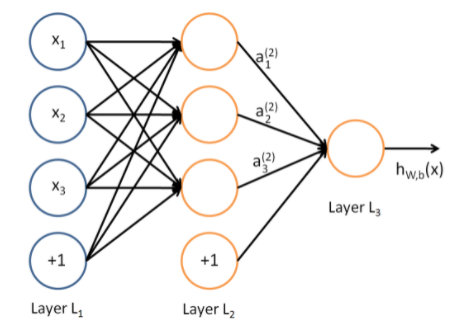

Let us explore the mathematical intuition behind the Artificial Neural Network. 

Layer 1 is a buffer layer which sends the input features as it is ,without passing any activation function,

### Considering Hidden Layer2 : 

$$ z_{1}^{1} = x_{1}*w_{11}^{1} + x_{2}*w_{21}^{1} + x_{3}*w_{31}^{1} + b_{1}^{1}  $$

$$ a_{1}^{1} = \sigma(z_{1}^{1})  $$

$$ z_{2}^{1} = x_{1}*w_{21}^{1} + x_{2}*w_{12}^{1} + x_{3}*w_{32}^{1} + b_{1}^{1}  $$

$$ a_{2}^{1} = \sigma(z_{2}^{1})  $$

### Final Ouput Layer 

$$ z_{1}^{2} = a_{1}^{1}*w_{11}^{2} + a_{2}^{1}*w_{21}^{1} + b_{1}^{1}  $$

$$ a_{1}^{2} = \sigma(z_{1}^{2})  $$


finally the output from the activation function is the predicted output.

Now Let us understand the <b> weight updation mathematical representation </b>....


$$ w_{new} = w_{old} + \Delta w $$

where $$ \Delta w = -\gamma \frac{\mathrm{d} e}{\mathrm{d} x} $$

Hence Finally the output comes out to be 
$$ w_{new} = w_{old} - \gamma \frac{\mathrm{d} e}{\mathrm{d} x} $$

Negative sign indicating the gradient descent which tries to converge to the global minima 

Now Let's update the <b> biase </b> where it is mathematically expressed as 

$$ b_{new} = b_{old} + \Delta \frac{\mathrm{d} b}{\mathrm{d} x} $$

where $$ \Delta b = - \gamma \frac{\mathrm{d} e}{\mathrm{d} x} $$

Hence Finally the <b> biase </b> upation formula is 
<b> $$ b_{new} = b_{old} - \gamma \frac{\mathrm{d} e}{\mathrm{d} x}  $$ </b>